<a href="https://colab.research.google.com/github/jsmnithya/Guvi/blob/main/Assignment12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.


**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [ ]:
import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

**Importing the dataset**

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv') 

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
df.shape

(400, 5)

In [ ]:
df.drop_duplicates()
df.shape

(400, 5)

In [ ]:
df=df.drop(['User ID'], axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
df["Gender"] = df["Gender"].map({"Male" : 0, "Female" : 1})
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


In [ ]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [ ]:
#Outlier detection
for col in df.columns:
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_threshold = df[col].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[col].quantile(0.25) - (1.5 * iqr)
  print("column name:", col)
  print('       upper threshold value:', upper_threshold)
  print('       lower threshold value:', lower_threshold)
  flag=0
  for i in range(1,8):
    if ((df[col].describe()[i]>=lower_threshold) and (df[col].describe()[i]<=upper_threshold)):
      pass
    else:
      flag=1
      break
  if i==1:
    print(col, '=> Outlier Detected')
  else:
    print(col, '=> Outlier Not Detected')

column name: Gender
       upper threshold value: 2.5
       lower threshold value: -1.5
Gender => Outlier Not Detected
column name: Age
       upper threshold value: 70.375
       lower threshold value: 5.375
Age => Outlier Not Detected
column name: EstimatedSalary
       upper threshold value: 155500.0
       lower threshold value: -24500.0
EstimatedSalary => Outlier Not Detected
column name: Purchased
       upper threshold value: 2.5
       lower threshold value: -1.5
Purchased => Outlier Not Detected


# **EDA**

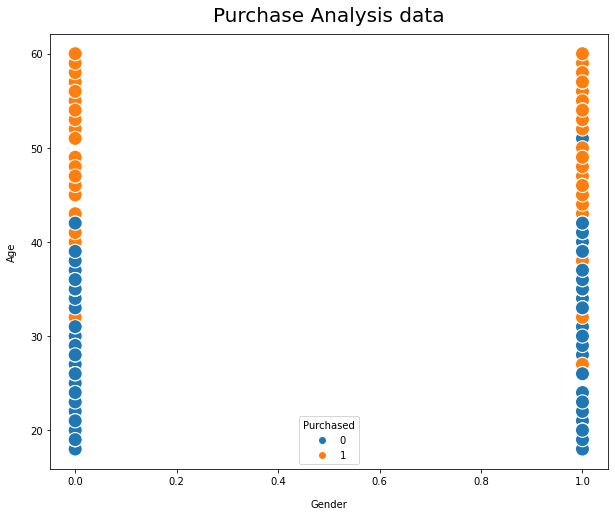

In [ ]:
plt.figure(figsize=(10, 8))
sn.scatterplot(x='Gender', y='Age', hue='Purchased', data=df, s=200)
plt.title("Purchase Analysis data", y=1.015, fontsize=20)
plt.xlabel("Gender", labelpad=13)
plt.ylabel("Age", labelpad=13)
ax = plt.gca()

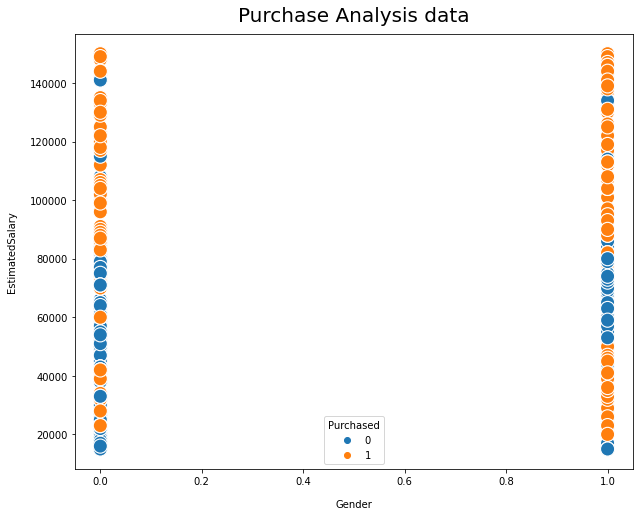

In [ ]:
plt.figure(figsize=(10, 8))
sn.scatterplot(x='Gender', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.title("Purchase Analysis data", y=1.015, fontsize=20)
plt.xlabel("Gender", labelpad=13)
plt.ylabel("EstimatedSalary", labelpad=13)
ax = plt.gca()

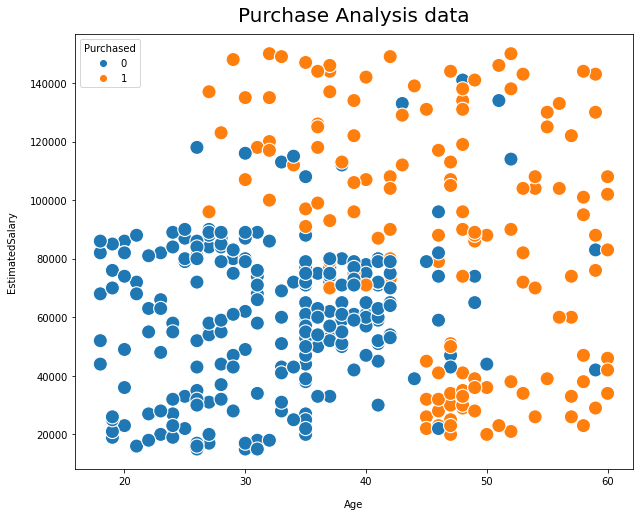

In [ ]:
plt.figure(figsize=(10, 8))
sn.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=200)
plt.title("Purchase Analysis data", y=1.015, fontsize=20)
plt.xlabel("Age", labelpad=13)
plt.ylabel("EstimatedSalary", labelpad=13)
ax = plt.gca()

**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(['Purchased'], axis=1)
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler # importing the required function
scaler = StandardScaler() #initialis
scaler.fit(X_train) # find the values of mu and sigma
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) #only transform the test dataset, dont fit it

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [ ]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train,y_train) 

LogisticRegression()

**Step 3 | Predection**

In [ ]:
y_pred=logistic_regression.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
print("The confusion matrix: \n", confusion_matrix(y_test,y_pred))
print("Accuracy : ", logistic_regression.score(X_test,y_test))
print("f1 score : ", f1_score(y_test,y_pred))
print("AUROC score : ", roc_auc_score(y_test,y_pred))


The confusion matrix: 
 [[63  9]
 [14 34]]
Accuracy :  0.8083333333333333
f1 score :  0.7472527472527473
AUROC score :  0.7916666666666667


**Visualization**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


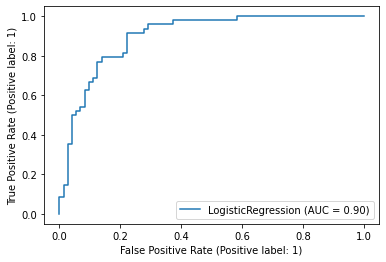

In [ ]:
plot_roc_curve(logistic_regression, X_test, y_test)